# Exp 002: This experiment simply outputs an annotated texts with level-coded annotations from POLKE

In [78]:
import sys
sys.path.append('../source')
import helpers
import data
import api
import importlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from tqdm import tqdm
import numpy as np
#importlib.reload(helpers)

Create example output to test the API

In [5]:
output_path = "../results/annotated_sample.html"
text = """
In an unparalleled display of athletic prowess and theatrical grandeur, WrestleMania is set to descend upon Hollywood, transforming it into a veritable Colosseum of modern-day gladiators for a special two-night Premium Live Event. This spectacle, steeped in the annals of wrestling lore, will unfurl its captivating narrative on Saturday, April 1, and Sunday, April 2, commencing at 8 PM Eastern Time and 5 PM Pacific Time. This event, a symphony of physicality and storytelling, will be streamed live on Peacock in the United States, while a global audience can witness the spectacle via the WWE Network.

The re-emergence of John Cena, a paragon of wrestling excellence whose name resonates with the gravitas of a bygone era, imbues this event with a profound sense of nostalgia and resurgence. His return, akin to the revival of a Shakespearean protagonist, is not merely a re-entry into the ring; it is a renaissance of the spirited athleticism and charismatic bravado that define the zenith of professional wrestling. As we await the unfolding of this grandiose event, WrestleMania, in its opulent Hollywood setting, promises to be a confluence of myth and reality, where legends walk among us, and tales of heroism are etched into the annals of sporting history.
"""

annotations = api.get_annotations(text)
helpers.html_from_annotations([], text, annotations, output_path) 

Systematically analyze skill detection of POLKE in EGP examples

In [65]:
egp = data.get_egp()
can_do_mapping, level_mapping = helpers.map_egp_id('../data/egp_list.xlsx')
reverse_mapping = {statement: nr for nr, statement in can_do_mapping.items()}

def find_rule(example, egp_id):
    annos = api.get_annotations(example)
    for id, begin, end in annos:
        if id == egp_id: return True
    return False

ratios = []
for idx, rule in tqdm(egp.iterrows(), total=len(egp)):
    #print(idx, rule['Can-do statement'])
    if rule['Type'] == "FORM":
        if isinstance(rule['Example'], str):
            assert rule['Can-do statement'] in reverse_mapping
            #print(rule['Can-do statement'])
            egp_id = reverse_mapping[rule['Can-do statement']]
            #print(egp_id)
            #print(rule['Example'])
            strings_to_search = rule['Example'].split("\n\n")
            #print(strings_to_search)
            found = [find_rule(example, egp_id) for example in strings_to_search]
            #print(found)
            ratios.append(sum(found) / len(found))
            #print(sum(found) / len(found))

100%|█| 1222/1222 [04:00<00:00,  5.09it


Visualization

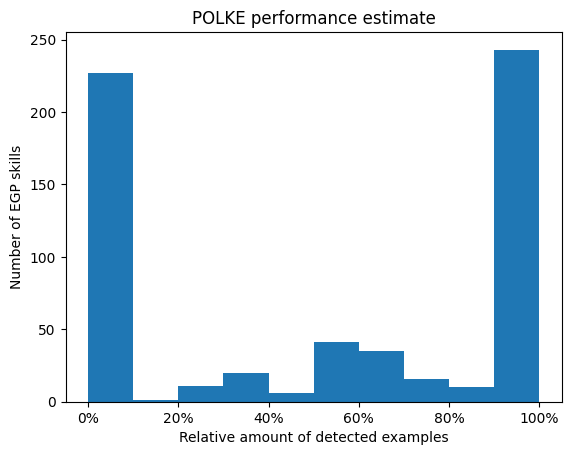

In [81]:
plt.hist(ratios)
plt.title("POLKE performance estimate")
plt.ylabel("Number of EGP skills")
plt.xlabel("Relative amount of detected examples")
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:.0f}%'))
plt.show()

Amount of all examples matched

In [72]:
print(f"{round(np.mean(np.array(ratios)==1.0) * 100, 1)}% of EGP skills' examples entirely detected.")

39.8% of EGP skills' examples entirely detected.
